<a href="https://colab.research.google.com/github/ReshmaMasutha/Linear-Algebra-The-Coding-Way/blob/main/Diagonalization/Diagonalization_Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

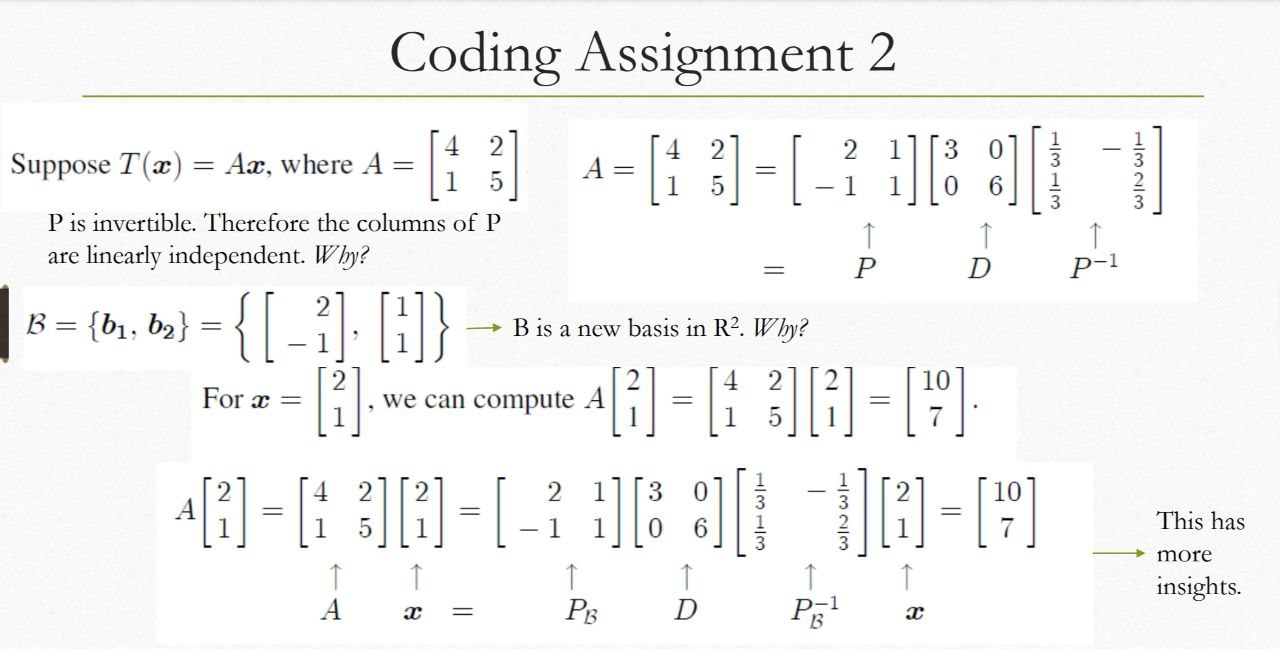

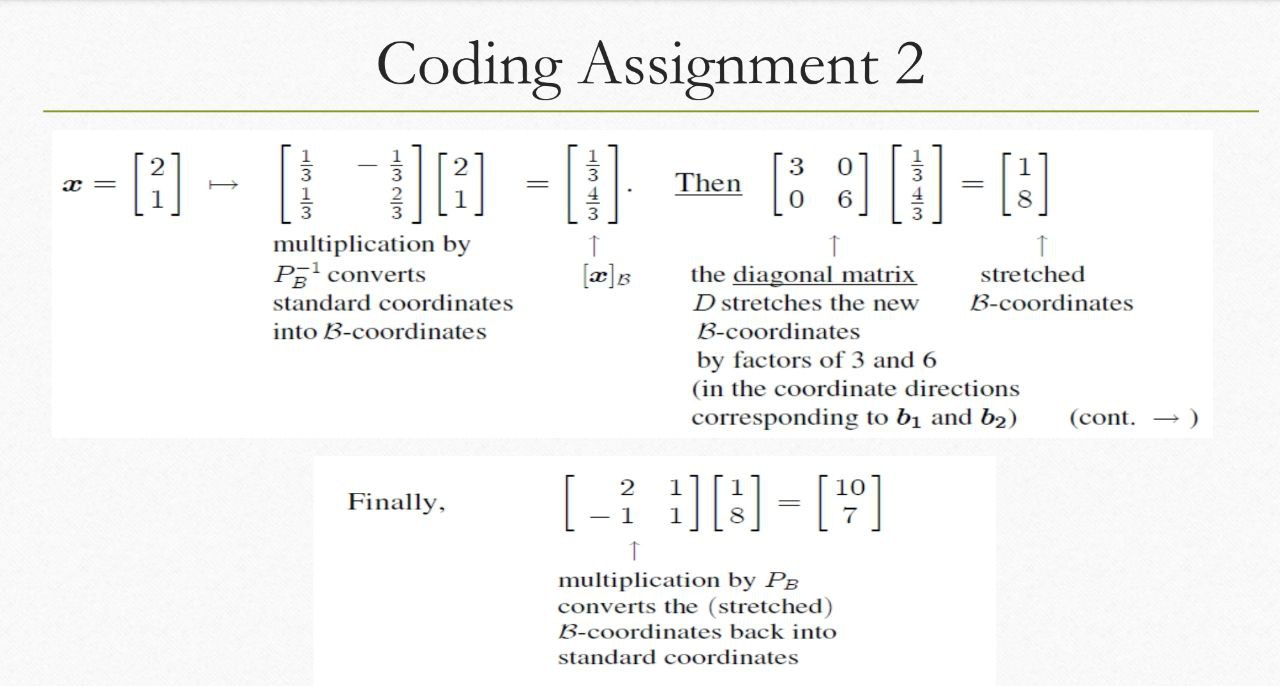

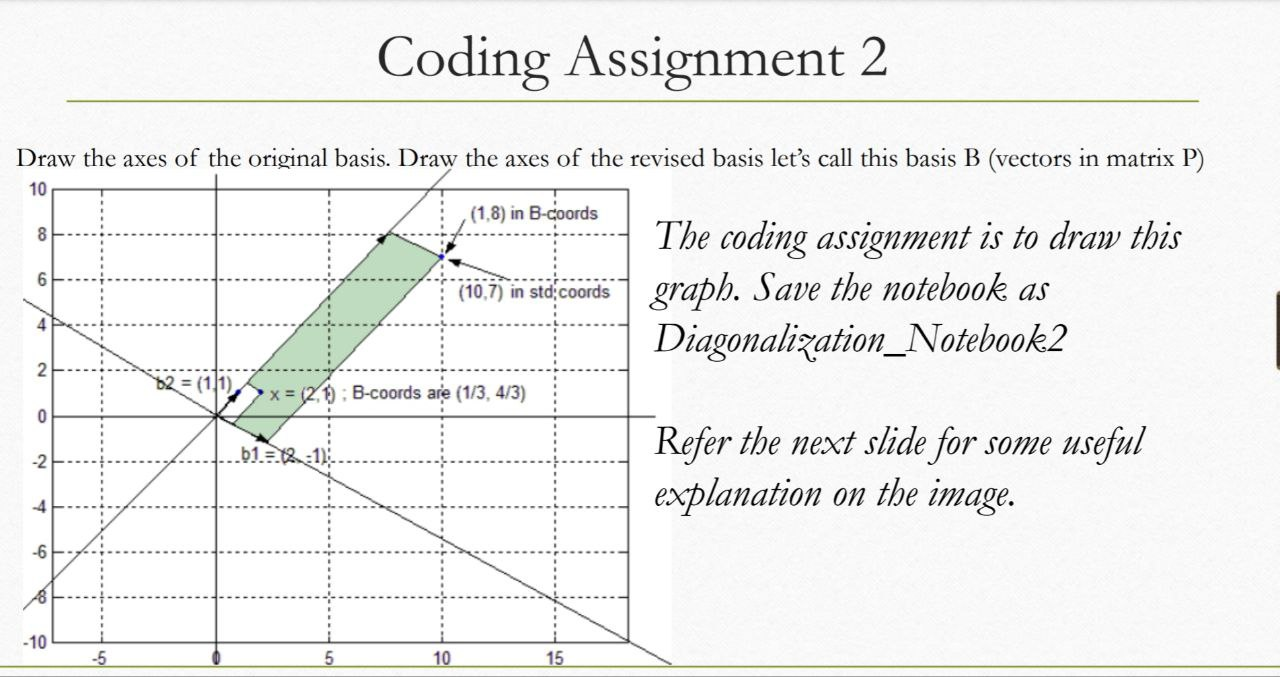

**Solution for the problem:**

1.Initializes the basis vectors b1 and b2.

2.Initializes the original vector x.

3.Sets the coordinates of x in the new basis x_b.

4.Sets the scaled coordinates in the new basis scaled_x_b.

5.Sets the transformed vector in the standard coordinates x_new.

6.Calls the plot_graph function to visualize the transformations.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

1.'P' is a matrix whose columns are basis vectors.

2.'D' is a diagonal matrix with scaling factors (eigenvalues).

3.'P_inv' is the inverse of P.

4.'x' is the original vector in the standard basis.

In [7]:
def diagonalize(A):
  # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(A)

    # Construct the diagonal matrix D
    D = np.diag(eigenvalues)

    #adjusting the columns of P
    mult1 = -1/eigenvectors.T[0][1]
    vect1 = mult1*eigenvectors.T[0]
    mult2 = 1/eigenvectors.T[1][1]
    vect2 = mult2*eigenvectors.T[1]

    # Stack the eigenvectors as columns to form the matrix P
    P = np.column_stack((vect1, vect2))
    P_inv = np.linalg.inv(P)

    return P, D, P_inv

**plotting function:**

Define a function 'plot_graph' to visualize the transformation of a vector x under the basis vectors of matrix A and its diagonalized form.


* 'plot_graph' is the function to plot vectors and transformations.

* 'b1' and 'b2' are the basis vectors.

*  'x' is the original vector.

*  'x_b' are the coordinates of x in the new basis.

* 'scaled_x_b' are the scaled coordinates in the new basis.

*  'x_new' is the transformed vector in the original basis.

*   'start' is the origin point for all arrows.





In [26]:
def plot_graph(p,p1,D,x):
  start = np.array([0, 0])  # Start point
  # Define ending points for arrows as NumPy arrays
  end_b1 = np.array([2, -1])   # (2, -1)
  end_b2 = np.array([1, 1])    # (1, 1)

  x_b= np.dot(P1, x) #x on b (1/3,4/3)
  stretched_x = np.dot(D,np.dot(P1, x)) #strectched x (1,8)
  std_coords =  np.dot(np.dot(P, D), np.dot(P1, x)) #std coords (10,7)

  std_stretched_x_along_b2 = end_b2*stretched_x[1]  # (8, 8)
  std_stretched_x_along_b1 = end_b1*stretched_x[0]  # (2, -1)
  x_along_b2 = end_b2*x_b[1]
  x_along_b1 = end_b1*x_b[0]
  # Create a figure and axis
  fig, ax = plt.subplots()

  # Plot arrows
  b2_positive_axis = ax.plot([std_stretched_x_along_b2[0]-0.3,15*end_b2[0]], [std_stretched_x_along_b2[1]-0.3,15*end_b2[1]], color='gray')
  b2_negative_axis = ax.plot([0,-11*end_b2[0]], [0,-11*end_b2[1]], color='gray')
  b1_positive_axis = ax.plot([end_b1[0]-start[0]-0.3, 10*end_b1[0]], [end_b1[1]-start[1]+0.03,10*end_b1[1]], color='gray')
  b1_negative_axis = ax.plot([0,-4*end_b1[0]], [0,-4*end_b1[1]], color='gray')

  line_to_stretched_x_along_b2 = ax.plot([std_stretched_x_along_b2[0],std_coords[0]], [std_stretched_x_along_b2[1],std_coords[1]], color='gray')
  line_to_stretched_x_along_b1 = ax.plot([std_stretched_x_along_b1[0],std_coords[0]], [std_stretched_x_along_b1[1],std_coords[1]], color='gray')

  basis1_arrow = ax.arrow(*start, end_b1[0]-start[0]-0.3, end_b1[1]-start[1]+0.03, head_width=0.3, head_length=0.3, fc='red', ec='red')
  basis2_arrow = ax.arrow(*start, end_b2[0]-start[0]-0.3, end_b2[1]-start[1]-0.3, head_width=0.3, head_length=0.3, fc='red', ec='red')
  point_b1 = ax.scatter(end_b1[0], end_b1[1], color='blue')
  point_b2 = ax.scatter(end_b2[0], end_b2[1], color='blue')
  point_x = ax.scatter(x[0], x[1], color='blue')
  point_stretched_x = ax.scatter(std_coords[0], std_coords[1], color='blue')
  arrow_on_b2 = ax.arrow(*(end_b2[0], end_b2[1]), std_stretched_x_along_b2[0]-end_b2[0]-0.3, std_stretched_x_along_b2[1]-end_b2[1]-0.3, head_width=0.3, head_length=0.3, fc='green', ec='green')

  line_to_x_along_b1 = ax.arrow(*(x_along_b1[0], x_along_b1[1]), x[0]-(x_along_b1[0]), x[1]-(x_along_b1[1]), head_width=0, head_length=0, fc='black', ec='black')
  line_to_x_along_b2 = ax.arrow(*(x_along_b2[0], x_along_b2[1]), x[0]-(x_along_b2[0]), x[1]-(x_along_b2[1]), head_width=0, head_length=0, fc='black', ec='black')

 # Add labels near the arrow heads
  ax.annotate(f'b1 = {end_b1}', xy=(end_b1[0]+1, end_b1[1]-1.01), xytext=(-20, 15), textcoords='offset points')
  ax.annotate(f'b2 = {end_b2}', xy=(end_b2[0]-1, end_b2[1]-0.5), xytext=(-20, 15), textcoords='offset points')
  ax.annotate(f'x = {x};  {np.round(x_b,2)}', xy=(x[0], x[1]), xytext=(5, -5), textcoords='offset points')
  ax.annotate(f'{stretched_x} \n {std_coords}', xy=(std_coords[0], std_coords[1]), xytext=(5, -5), textcoords='offset points')

    # Set limits and labels
  ax.set_xlim(-5, 15)
  ax.set_ylim(-5, 15)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')

    # Show plot
  plt.grid()
  plt.show()
  print(x_b,stretched_x)
  print(std_coords)
  print(std_stretched_x_along_b2,std_stretched_x_along_b1)
  print(x_along_b2,x_along_b1)

**Diagonalization Function:**

1.Define a function diagonalize to diagonalize the matrix A, which involves finding the eigenvalues and eigenvectors and adjusting the eigenvector matrix P.

2.Define a matrix A, diagonalize it, and use the plotting function to visualize the transformations.

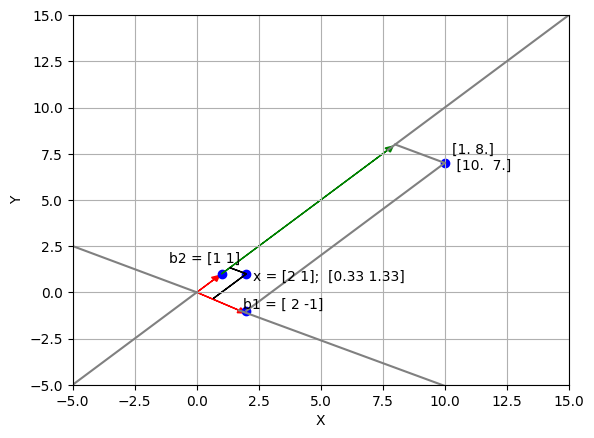

[0.33333333 1.33333333] [1. 8.]
[10.  7.]
[8. 8.] [ 2. -1.]
[1.33333333 1.33333333] [ 0.66666667 -0.33333333]


In [27]:
A = np.array([[4, 2],
              [1, 5]])

P, D, P1 = diagonalize(A)
x = np.array([2, 1])
plot_graph(P, P1,D, x)